In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('/content/housing.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x= df.drop('median_house_value',axis=1)
y=df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19665,-120.82,37.51,17.0,1664.0,253.0,736.0,254.0,4.4083,INLAND,165800.0
9083,-118.17,34.68,13.0,5341.0,773.0,2288.0,724.0,6.6772,INLAND,185600.0
19452,-120.94,37.68,4.0,13315.0,2424.0,6420.0,2289.0,4.2471,INLAND,162100.0
7423,-118.21,33.96,43.0,1686.0,446.0,1590.0,474.0,2.3241,<1H OCEAN,159300.0
15135,-116.92,32.85,23.0,1378.0,269.0,767.0,266.0,4.0625,<1H OCEAN,145000.0


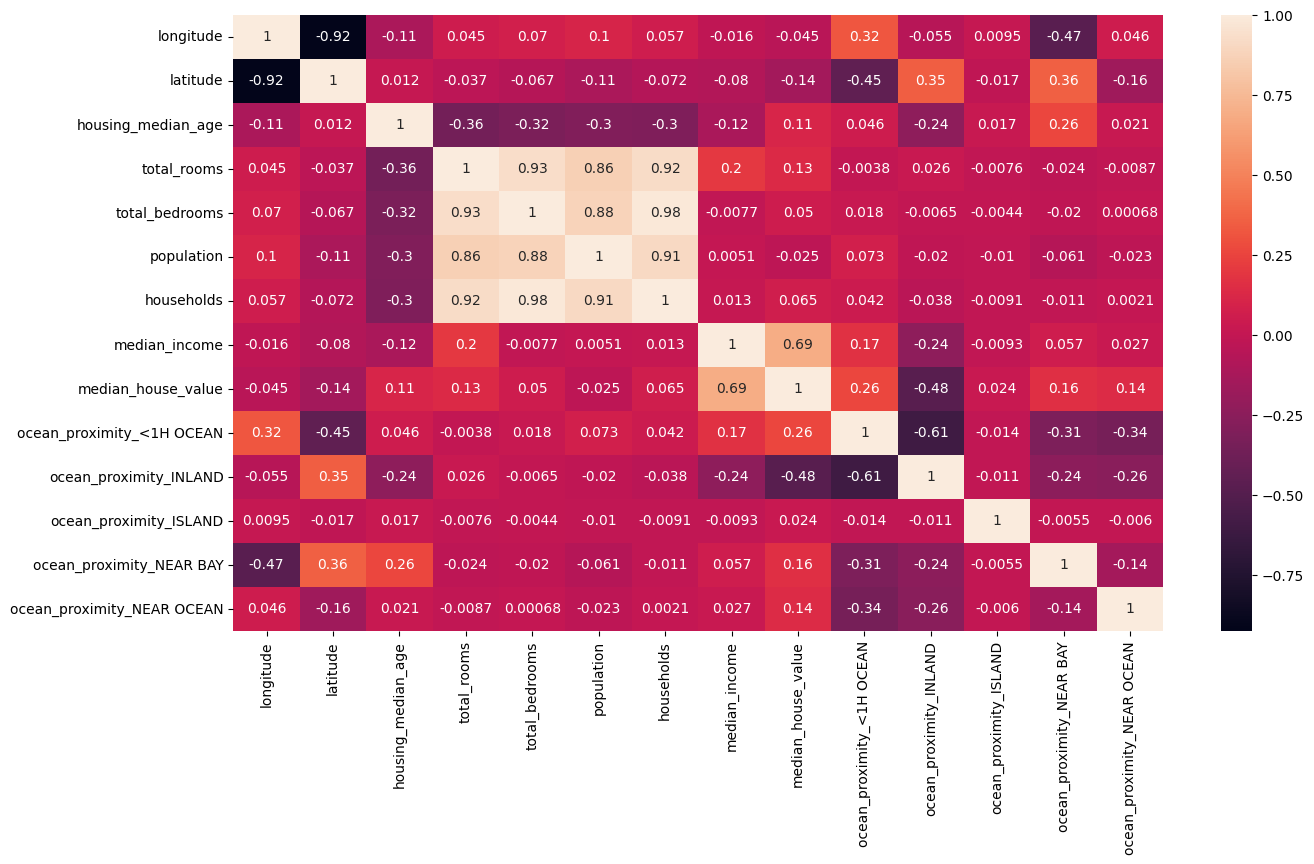

In [22]:
plt.figure(figsize=(15,8))
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
sb.heatmap(df_encoded.corr(),annot=True)
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

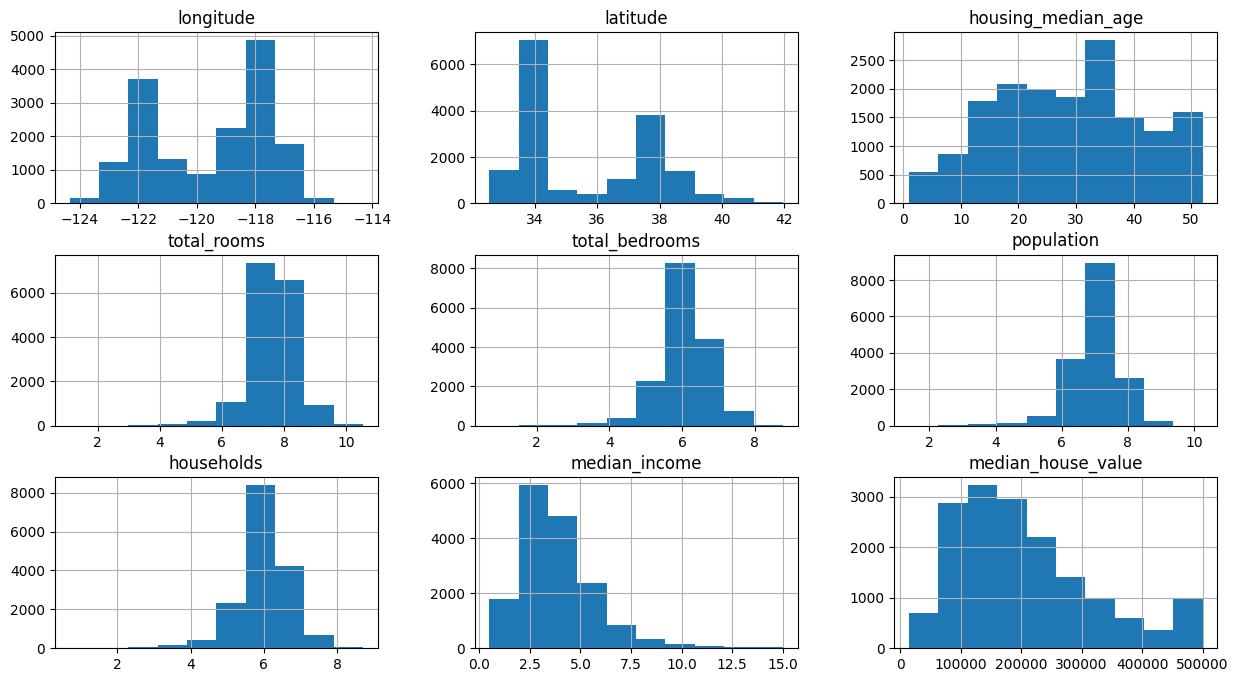

In [24]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)  # Correct the order of operations
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data.hist(figsize=(15, 8))

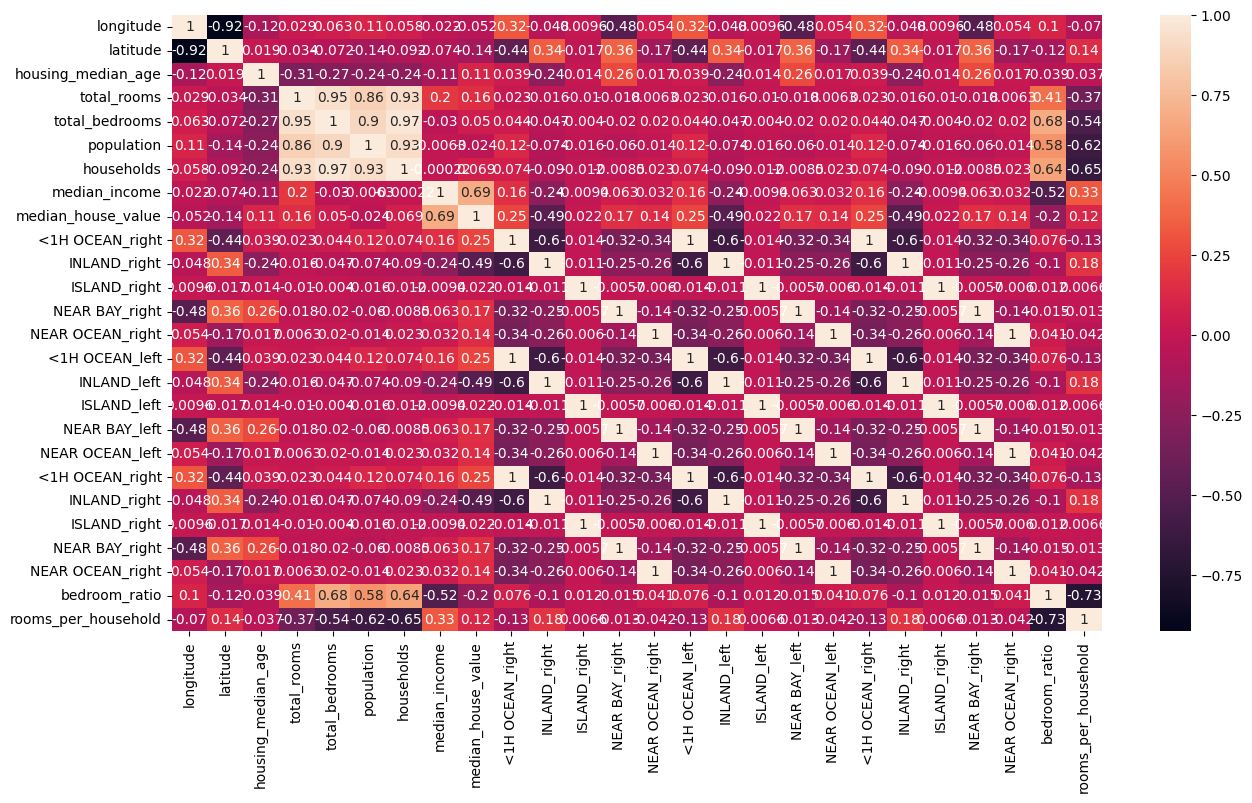

In [55]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['rooms_per_household']=train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sb.heatmap(train_data.corr(),annot=True)
plt.show()

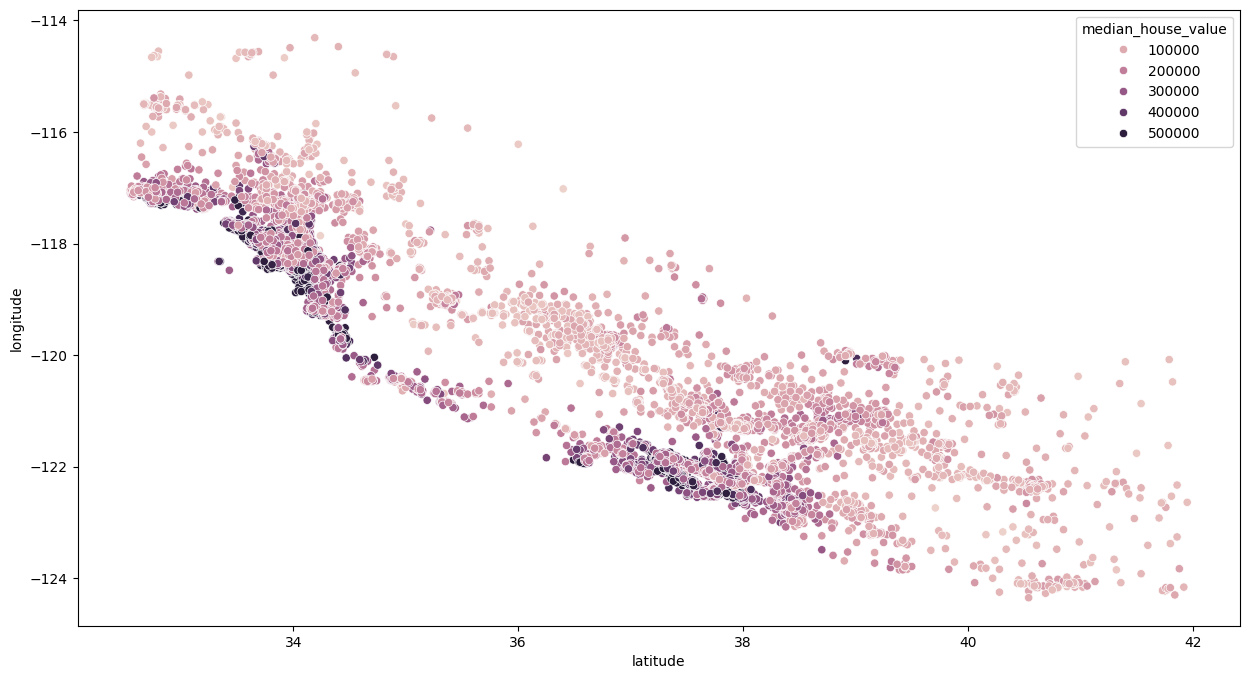

In [77]:
plt.figure(figsize=(15,8))
sb.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value')
plt.show()

In [79]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [60]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop('median_house_value',axis=1),train_data['median_house_value']
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [61]:
LinearRegression()

LinearRegression()

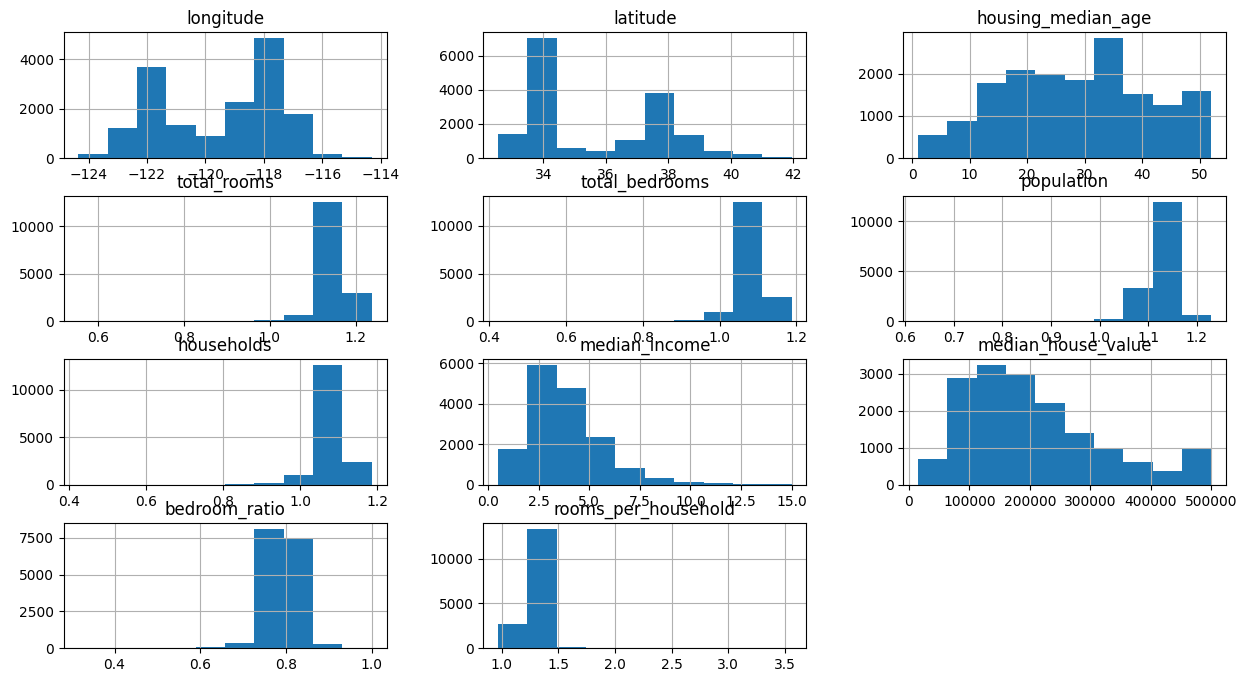

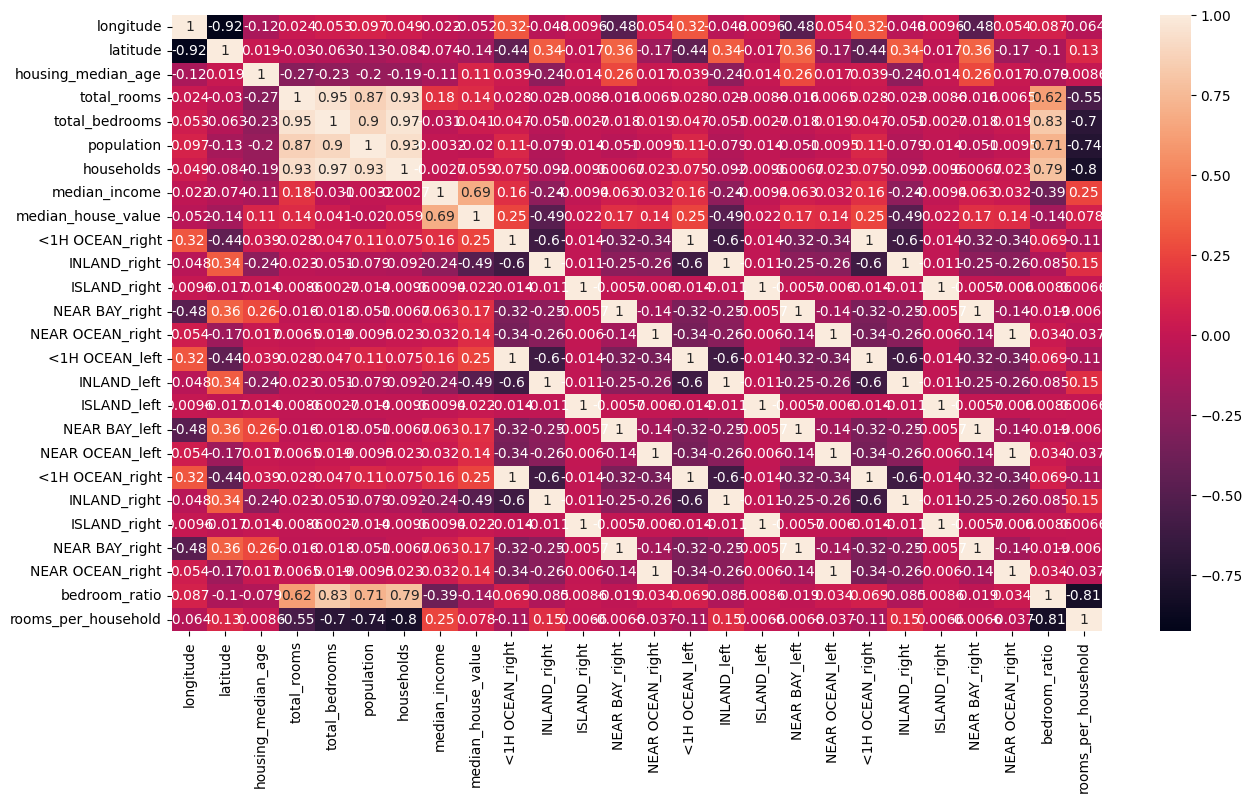

In [68]:
test_data = x_test.join(y_test)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)  # Correct the order of operations
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data.hist(figsize=(15, 8))
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['rooms_per_household']=train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sb.heatmap(train_data.corr(),annot=True)
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
x_test,y_test = test_data.drop('median_house_value',axis=1),test_data['median_house_value']

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'rooms_per_household'}>, <Axes: >]],
      dtype=object)

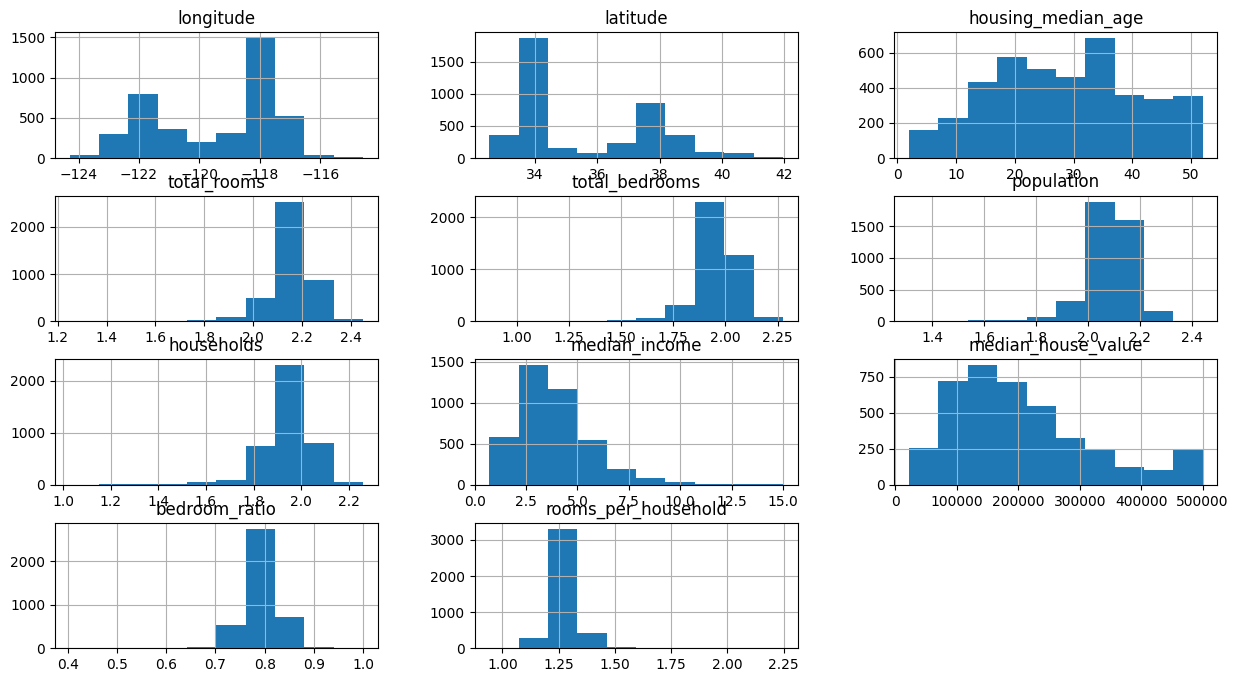

In [81]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)  # Correct the order of operations
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data.hist(figsize=(15, 8))

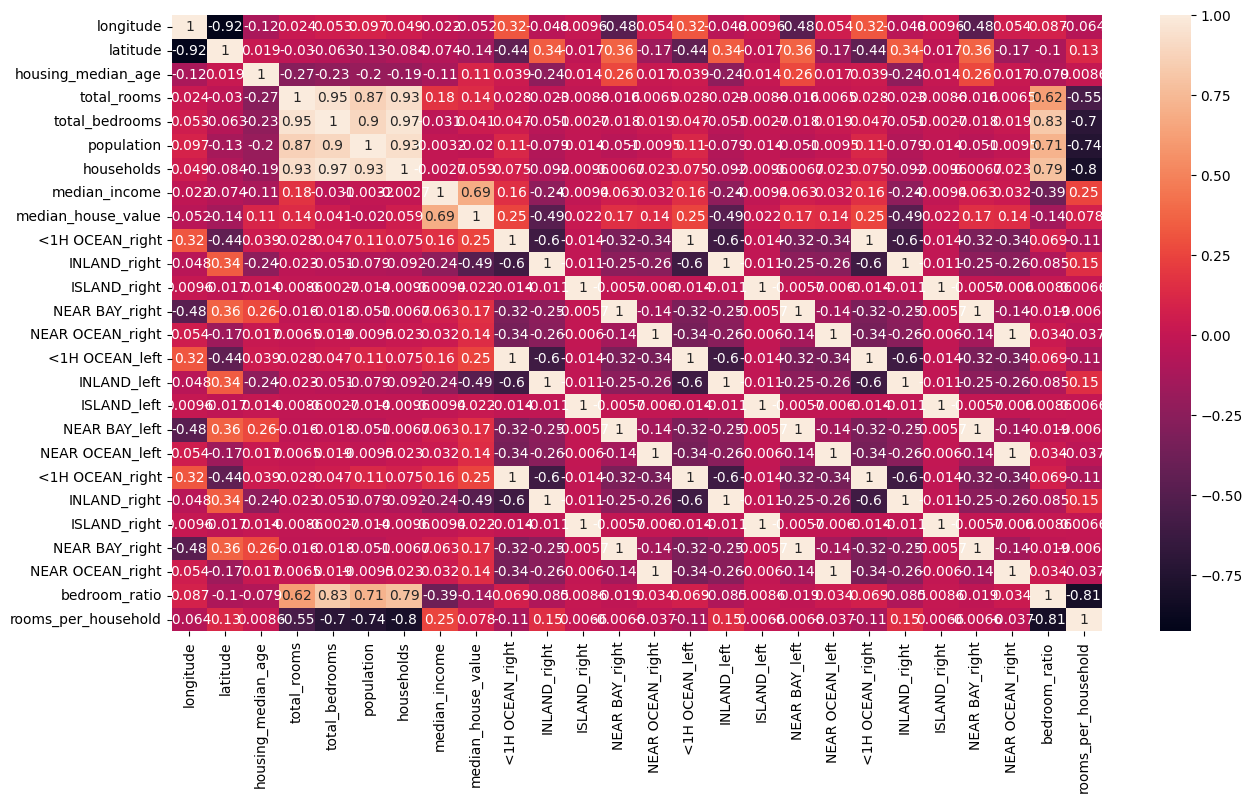

In [82]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['rooms_per_household']=train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sb.heatmap(train_data.corr(),annot=True)
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop('median_house_value',axis=1),train_data['median_house_value']

In [86]:
reg.score(x_train,y_train)

0.14265448607339248